# Problem set 1

*Author: Danilo Lessa Bernardineli (danilo.bernardineli@usp.br)*

## Dependences

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from functools import reduce

## Problem 1 - Logistic Map

Obtain the numerical values for figures 1 through 5 for the "Simple mathematical models with very complicated systems" article, and discuss the interpretations for each of them.

### Numerical output

In [2]:
@np.vectorize
def logistic_map(X: np.array, a: float) -> np.array:
    return a * X * (1 - X)

def recursive_logistic_map(x: float, a: float, N: int=1) -> float:
    for n in range(N):
        x = logistic_map(x, a)
        yield x
        
def logistic_lyapunov_exponent(a: float) -> float:
    x = np.random.random()
    X = np.array(list(recursive_logistic_map(x, a, 10000)))
    derivatives = a * (1 - 2 * X)
    factors = np.log(np.abs(derivatives))
    lyapunov_exponent = np.sum(factors) / X.shape[0]
    return lyapunov_exponent

#### Figure 1

(X_t) 0.19 -> 0.42 (a) or 0.53 (b)
(X_t) 0.20 -> 0.43 (a) or 0.54 (b)
(X_t) 0.21 -> 0.45 (a) or 0.57 (b)
(X_t) 0.23 -> 0.48 (a) or 0.61 (b)
(X_t) 0.27 -> 0.53 (a) or 0.67 (b)
(X_t) 0.29 -> 0.56 (a) or 0.70 (b)
(X_t) 0.43 -> 0.66 (a) or 0.84 (b)
(X_t) 0.52 -> 0.68 (a) or 0.85 (b)
(X_t) 0.74 -> 0.52 (a) or 0.65 (b)
(X_t) 0.97 -> 0.08 (a) or 0.11 (b)


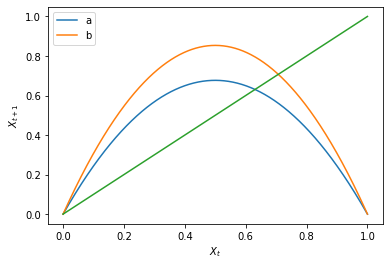

In [21]:
# Parameters
N = 1000
a = 2.707
b = 3.414
x_0 = np.linspace(0, 1, N)

# Numeric calculation
x_a = logistic_map(x_0, a)
x_b = logistic_map(x_0, b)

# Print random values for X_t and X_{t+1}
values = list(zip(x_0, x_a, x_b))
for tup in sorted(random.choices(values, k=10)):
    print("(X_t) {:.2f} -> {:.2f} (a) or {:.2f} (b)".format(*tup))

# Plot
plt.plot(x_0, x_a, label='a')
plt.plot(x_0, x_b, label='b')
plt.plot(x_0, x_0)
plt.xlabel("$X_t$")
plt.ylabel("$X_{t+1}$")
plt.legend()
plt.show()

#### Figure 2 and 3

(X_t) 0.14 -> 0.59 (a=2.707) or 0.82 (a=3.414)
(X_t) 0.28 -> 0.67 (a=2.707) or 0.73 (a=3.414)
(X_t) 0.39 -> 0.62 (a=2.707) or 0.53 (a=3.414)
(X_t) 0.39 -> 0.62 (a=2.707) or 0.52 (a=3.414)
(X_t) 0.41 -> 0.61 (a=2.707) or 0.49 (a=3.414)
(X_t) 0.43 -> 0.60 (a=2.707) or 0.46 (a=3.414)
(X_t) 0.50 -> 0.59 (a=2.707) or 0.43 (a=3.414)
(X_t) 0.64 -> 0.64 (a=2.707) or 0.58 (a=3.414)
(X_t) 0.69 -> 0.66 (a=2.707) or 0.67 (a=3.414)
(X_t) 0.86 -> 0.59 (a=2.707) or 0.82 (a=3.414)


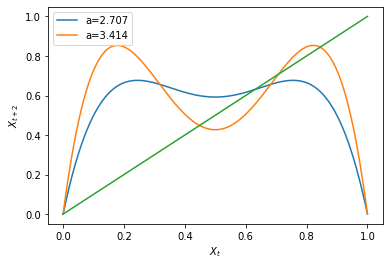

In [20]:
# Parameters
N = 1000
a = 2.707
b = 3.414
x_0 = np.linspace(0, 1, N)

# Numeric calculation
x_a = logistic_map(logistic_map(x_0, a), a)
x_b = logistic_map(logistic_map(x_0, b), b)

# Print random values for X_t and X_{t+1}
values = list(zip(x_0, x_a, x_b))
for tup in sorted(random.choices(values, k=10)):
    print("(X_t) {:.2f} -> {:.2f} (a=2.707) or {:.2f} (a=3.414)".format(*tup))

# Plot
plt.plot(x_0, x_a, label='a={}'.format(a))
plt.plot(x_0, x_b, label='a={}'.format(b))
plt.xlabel("$X_t$")
plt.ylabel("$X_{t+2}$")
plt.plot(x_0, x_0)
plt.legend()
plt.show()

#### Figure 4.a

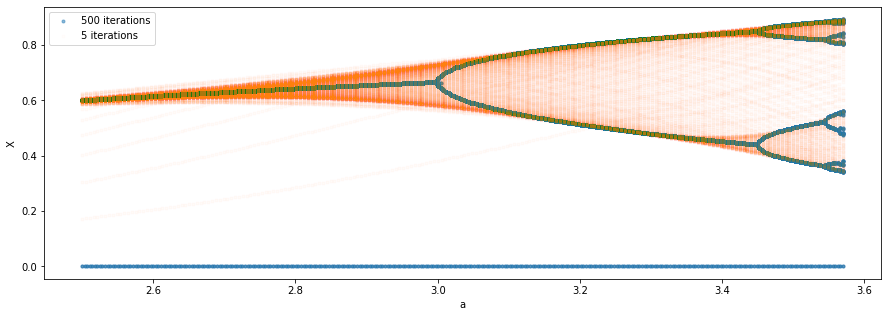

In [5]:
plt.figure(figsize=(15, 5))

# Convergence
N_x = 100
N_a = 300
M = 500
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(2.5, 3.57, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(2.5, 3.57, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))

plt.xlabel("a")
plt.ylabel("X")
plt.legend()

plt.show()

#### Figure 4.b

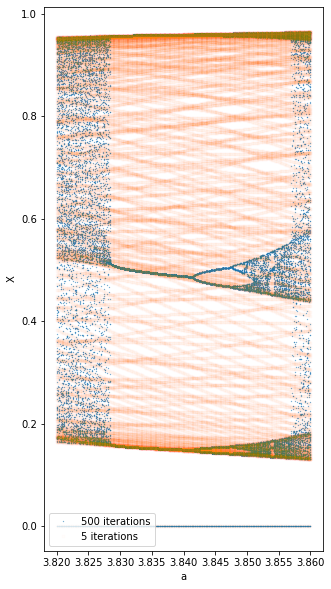

In [6]:
plt.figure(figsize=(5, 10))

# Convergence
N_x = 100
N_a = 400
M = 500
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(3.82, 3.86, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(3.82, 3.86, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
plt.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))

plt.xlabel("a")
plt.ylabel("X")
plt.legend()

plt.show()

#### Figure 5

(X_t) 0.10 -> 0.56 (a) or 0.41 (b)
(X_t) 0.11 -> 0.45 (a) or 0.28 (b)
(X_t) 0.13 -> 0.35 (a) or 0.16 (b)
(X_t) 0.21 -> 0.38 (a) or 0.34 (b)
(X_t) 0.29 -> 0.82 (a) or 0.93 (b)
(X_t) 0.33 -> 0.92 (a) or 0.97 (b)
(X_t) 0.70 -> 0.85 (a) or 0.95 (b)
(X_t) 0.75 -> 0.61 (a) or 0.68 (b)
(X_t) 0.79 -> 0.42 (a) or 0.41 (b)
(X_t) 0.79 -> 0.39 (a) or 0.37 (b)


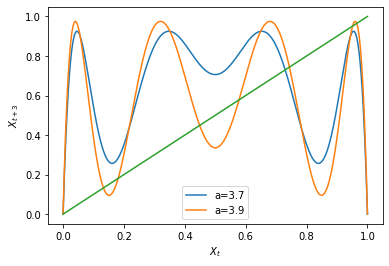

In [19]:
# Parameters
N = 1000
a = 3.7
b = 3.9
x_0 = np.linspace(0, 1, N)

# Numeric calculation
x_a = list(recursive_logistic_map(x_0, a, 3))[-1]
x_b = list(recursive_logistic_map(x_0, b, 3))[-1]

# Print random values for X_t and X_{t+1}
values = list(zip(x_0, x_a, x_b))
for tup in sorted(random.choices(values, k=10)):
    print("(X_t) {:.2f} -> {:.2f} (a) or {:.2f} (b)".format(*tup))

# Plot
plt.plot(x_0, x_a, label='a={}'.format(a))
plt.plot(x_0, x_b, label='a={}'.format(b))
plt.plot(x_0, x_0)
plt.xlabel("$X_t$")
plt.ylabel("$X_{t+3}$")
plt.legend()
plt.show()

### Discussions

Figures 1 and 2 shows how the logistic map goes from an single stable fixed point to an two-point fixed points due to the slope of the curve in the intersection with an 45deg line.

By the same procedure, is show in figure 3 that for $a=3.414$, no longer there are two stable fixed points.

As for figure 4, the stable fixed points in function of $a$ are plotted in two regions of relative stability regarding the control parameter. An thing of note, is that we can't see the unstable fixed points. This is due to the numerical sensivity of the logistic map.


## Problem 2 - Lyanpunov exponents on Logistic Map

### P2.a

* Do numerical calculations for the logistic map bifurcation diagram by setting the control parameter on the interval $a \in [1, 4]$.
* Plot the Lyanpunov exponent in terms of the control parameter.

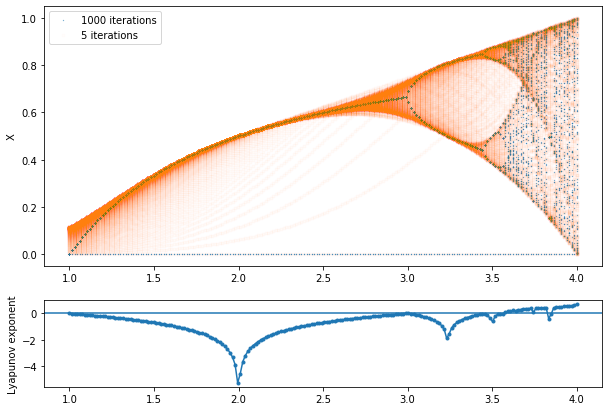

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})


# Parameters
a_i = 1.0
a_f = 4.0

# Convergence
N_x = 100
N_a = 200
M = 1000
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
exponents = []
for a in A:
    X = list(recursive_logistic_map(x_0, a, M))
    x_f = X[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))
ax1.set_ylabel("X")
ax1.legend()

## Lyapunov

# Parameters
N_a = 200
A = np.linspace(a_i, a_f, N_a)
points = [(a, logistic_lyapunov_exponent(a)) for a in A]
(x, y) = list(zip(*points))
ax2.plot(x, y, '.-')
ax2.set_ylabel("Lyapunov exponent")
ax2.axhline(0)

plt.show()

### P2.b

* Make an zoom for the above plots for the following control parameter intervals:
    * $a \in [3.4, 4.0]$
    * $a \in [3.82, 3.86]$

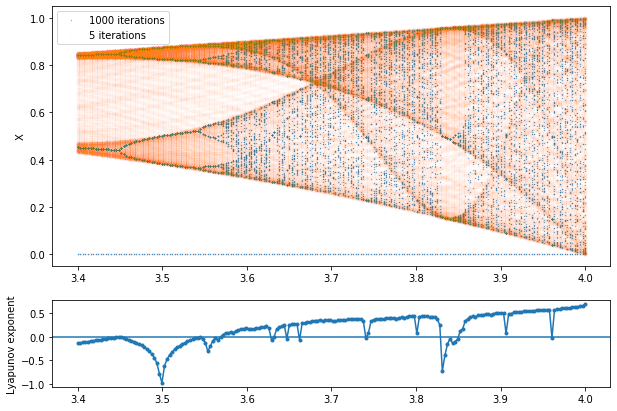

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})


# Parameters
a_i = 3.4
a_f = 4.0

# Convergence
N_x = 100
N_a = 200
M = 1000
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
exponents = []
for a in A:
    X = list(recursive_logistic_map(x_0, a, M))
    x_f = X[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))
ax1.set_ylabel("X")
ax1.legend()

## Lyapunov

# Parameters
N_a = 200
A = np.linspace(a_i, a_f, N_a)
points = [(a, logistic_lyapunov_exponent(a)) for a in A]
(x, y) = list(zip(*points))
ax2.plot(x, y, '.-')
ax2.set_ylabel("Lyapunov exponent")
ax2.axhline(0)

plt.show()

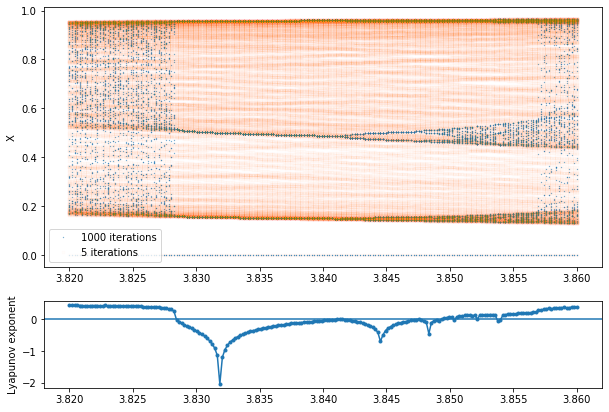

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})


# Parameters
a_i = 3.82
a_f = 3.86

# Convergence
N_x = 100
N_a = 200
M = 1000
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
exponents = []
for a in A:
    X = list(recursive_logistic_map(x_0, a, M))
    x_f = X[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=1.0, markersize=0.5, label="{} iterations".format(M))

# First 5 iterations
N_x = 500
N_a = 200
M = 5
x_0 = np.linspace(0, 1, N_x)
A = np.linspace(a_i, a_f, N_a)

points = []
for a in A:
    x_f = list(recursive_logistic_map(x_0, a, M))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)
        
a, x = list(zip(*points))
ax1.plot(a, x, '.', alpha=0.01, label="{} iterations".format(M))
ax1.set_ylabel("X")
ax1.legend()

## Lyapunov

# Parameters
N_a = 200
A = np.linspace(a_i, a_f, N_a)
points = [(a, logistic_lyapunov_exponent(a)) for a in A]
(x, y) = list(zip(*points))
ax2.plot(x, y, '.-')
ax2.set_ylabel("Lyapunov exponent")
ax2.axhline(0)

plt.show()

## Problem 3 - Strange Attractor

Obtain the numerical values for figure 2 through 6 for the "A two-dimensional mapping with a strange attractor" article, and discuss the interpretations for each of them.

### Numerical output

In [11]:
from typing import Tuple

def strange_map(x: float, y: float, a: float, b: float) -> Tuple[float, float]:
    new_x = y + 1 - a * x ** 2
    new_y = b * x
    return (new_x, new_y)


def recursive_strange_map(x: float, y: float, a: float, b: float, N: int=1) -> float:
    for n in range(N):
        (x, y) = strange_map(x, y, a, b)
        yield (x, y)

#### Figure 2

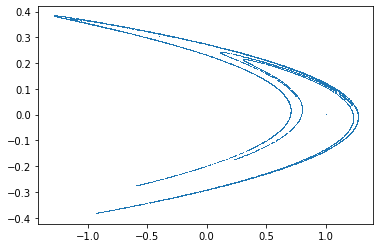

In [12]:
x_0 = 0
y_0 = 0
a = 1.4
b = 0.3
N = 10000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.show()

#### Figure 3

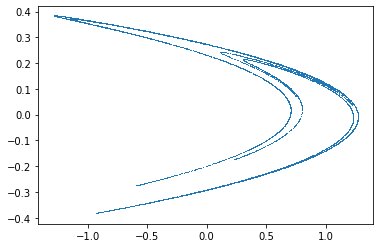

In [13]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 10000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.show()

#### Figure 4

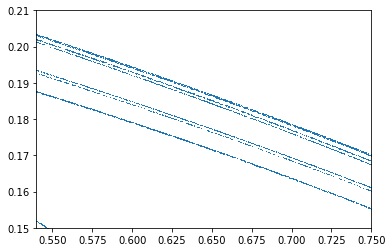

In [14]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 100000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.xlim((0.54, 0.75))
plt.ylim((0.15, 0.21))
plt.show()

#### Figure 5

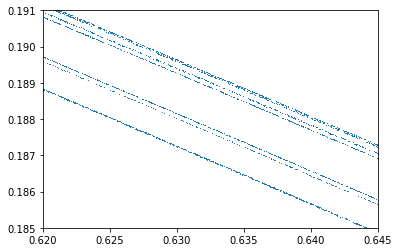

In [15]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 1000000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.xlim((0.620, 0.645))
plt.ylim((0.185, 0.191))
plt.show()

#### Figure 6

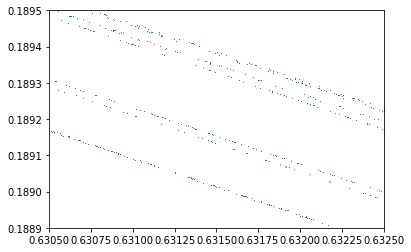

In [16]:
x_0 = 0.63135448
y_0 = 0.18940634
a = 1.4
b = 0.3
N = 5000000
(X, Y) = list(zip(*recursive_strange_map(x_0, y_0, a, b, N)))

plt.plot(X, Y, ',')
plt.xlim((0.6305, 0.6325))
plt.ylim((0.1889, 0.1895))
plt.show()

### Discussions

Figure 2 and 3 shows the strange attractor for two different initial conditions on $x$ and $y$. Notice that they look the same, which is symptomatic that there is an stable fixed curve for the given parameters.

Figure 4 through 6 shows an feature of this map: it is fractal, meaning that it is scale invariant.

## Problem 4

### P4.a

* Do numerical calculations for the bifucartion diagram by setting the control parameters on the intervals $a \in [0, 1.25]$ and $b=0.4$.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


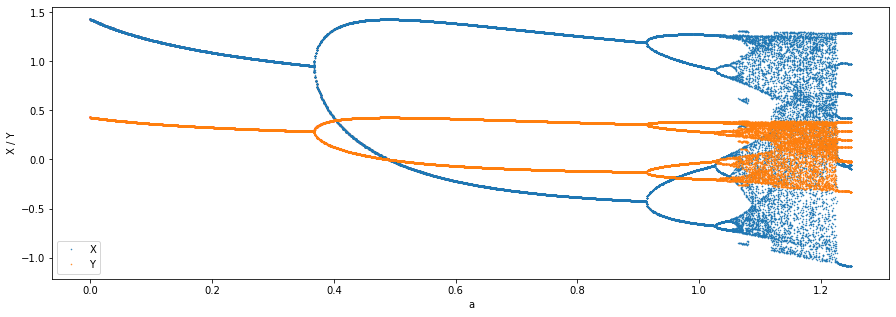

In [17]:
N = 2000
N_x = 100
N_y = 100
N_a = 1000
a_0 = 0
a_f = 1.25
X_0 = np.linspace(-2.5, 2.5, N_x)
Y_0 = np.linspace(-2.5, 2.5, N_y)
A = np.linspace(a_0, a_f, N_a)
b = 0.3

points = []
for a in A:
    (X, Y) = list(zip(*recursive_strange_map(X_0, Y_0, a, b, N)))
    x_f = X[-1]
    y_f = Y[-1]
    iteration_points = list(zip([a] * len(x_f), x_f, y_f))
    points += iteration_points

A, X, Y = list(zip(*points))

plt.figure(figsize=(15, 5))
plt.plot(A, X, '.', markersize=1, label='X')
plt.plot(A, Y, '.', markersize=1, label='Y')
plt.xlabel('a')
plt.ylabel('X / Y')
plt.legend()
plt.show()

### P4.b

* Plot the bifurcation diagram above for the following control parameter interval:
    * $a \in [0.9, 1,2]$
* Identify the attractors on this diagram and compare with the figure 2.17 of the Chaos (Alligood) book.

#### Bifurcation diagram

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


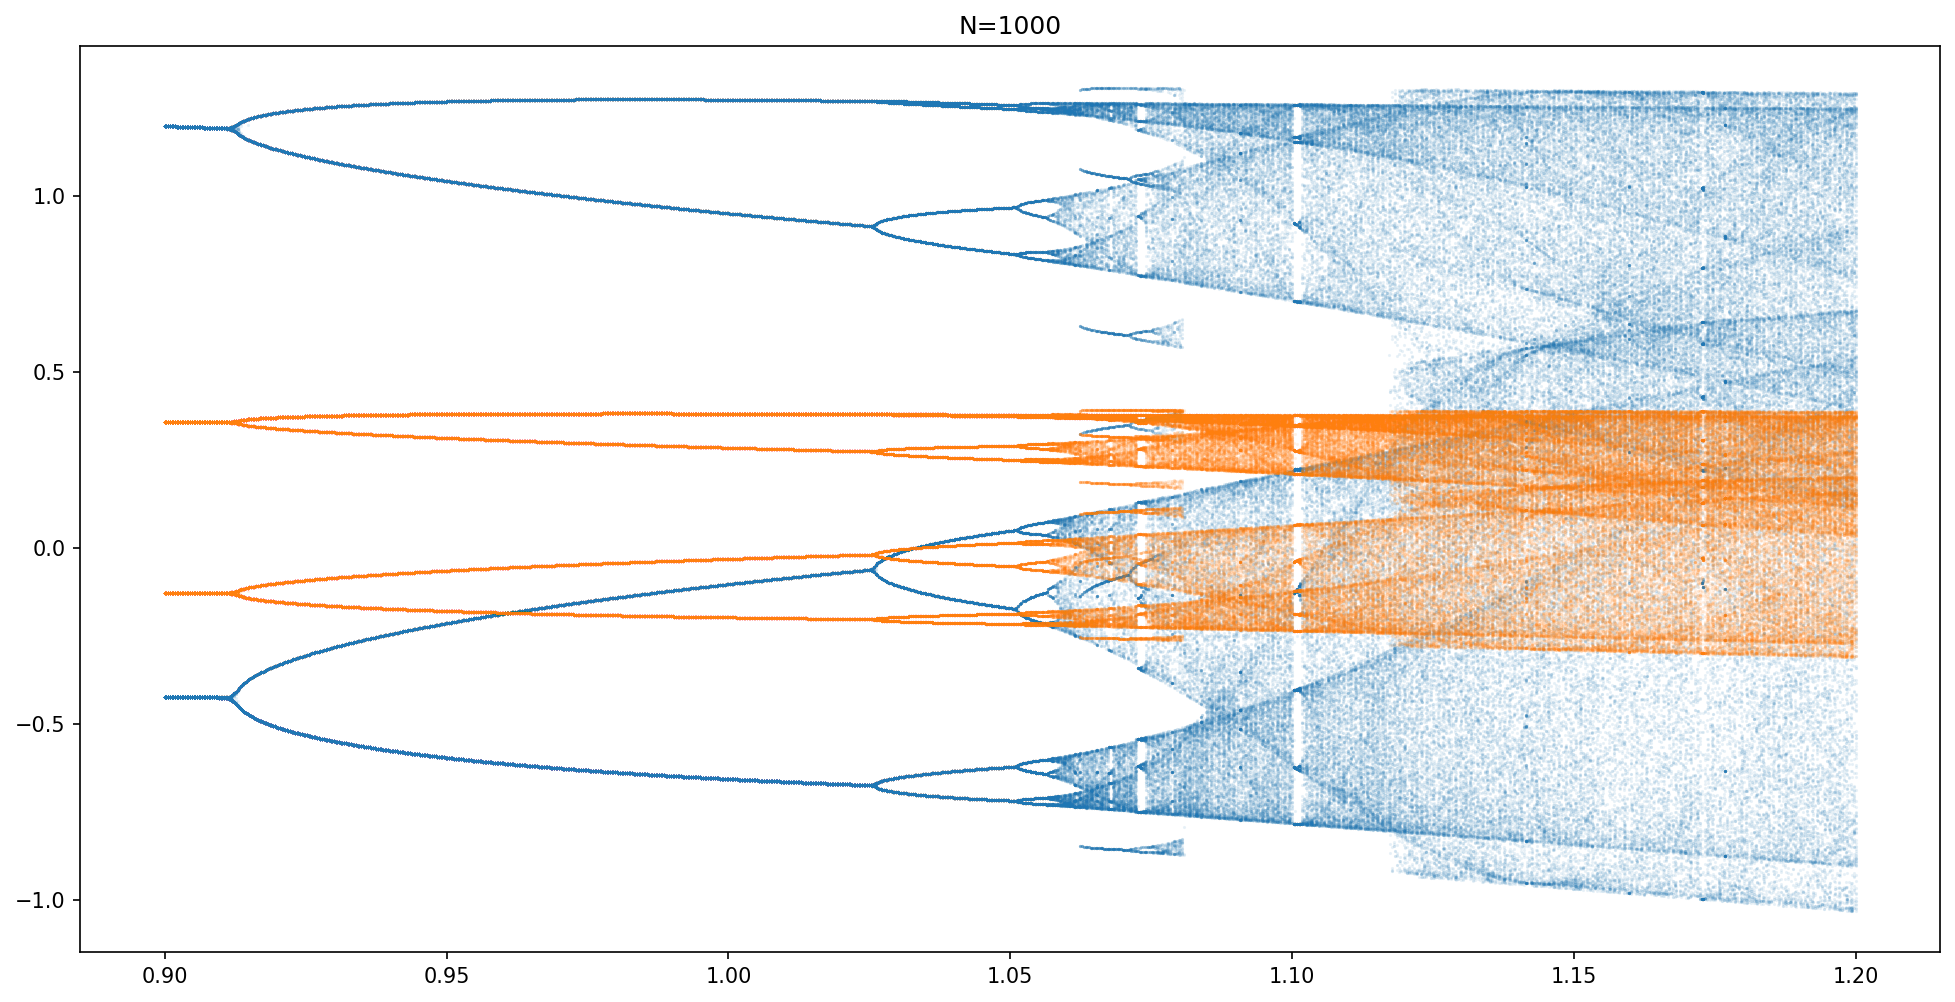

In [28]:
N = 1000
N_x = 600
N_y = 600
N_a = 1000
a_0 = 0.9
a_f = 1.2
X_0 = np.linspace(-2.5, 2.5, N_x)
Y_0 = np.linspace(-2.5, 2.5, N_y)
A = np.linspace(a_0, a_f, N_a)
b = 0.3

points = []
for a in A:
    (X, Y) = list(zip(*recursive_strange_map(X_0, Y_0, a, b, N)))
    x_f = X[-1]
    y_f = Y[-1]
    iteration_points = list(zip([a] * len(x_f), x_f, y_f))
    points += iteration_points
A, X, Y = list(zip(*points))

plt.figure(figsize=(16, 8), dpi=150)
plt.title("N={}".format(N))
plt.plot(A, X, '.', markersize=1, label='X', alpha=0.1)
plt.plot(A, Y, '.', markersize=1, label='Y', alpha=0.1)
#plt.axis('off')
plt.show()

#### Attractors

We can see from the above figure a lot of similiarities with the logistic map, which is associated with the stable fixed points (point attractors). However, the attractor is an two-dimensional map, which means that the union of the line attractors on both dimensions generates curve attractors.

Below, you can see an quick comparison between the logistic map and the strange attractor.


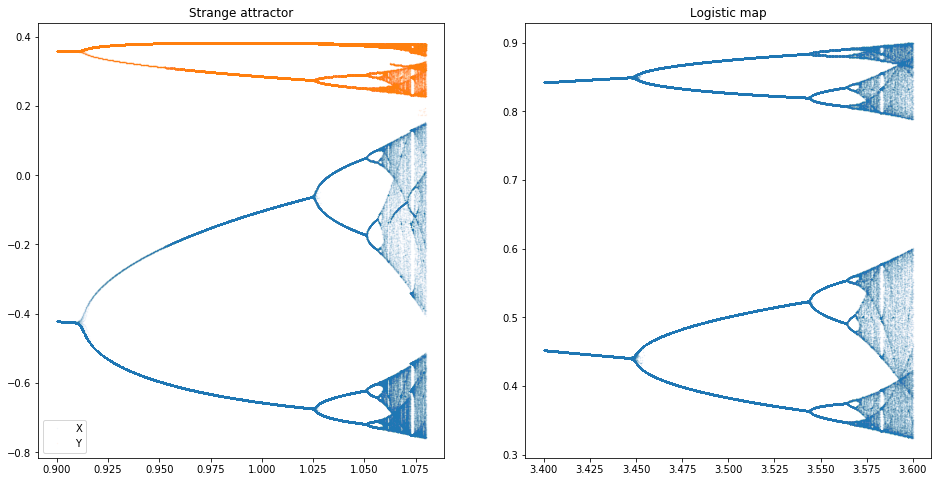

In [56]:
N = 500
N_x = 600
N_y = 600
N_a = 1000
a_0 = 0.9
a_f = 1.08
X_0 = np.linspace(0, 1.0, N_x)
Y_0 = np.linspace(0, 1.0, N_y)
A = np.linspace(a_0, a_f, N_a)
b = 0.3

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))
points = []
for a in A:
    (X, Y) = list(zip(*recursive_strange_map(X_0, Y_0, a, b, N)))
    x_f = X[-1]
    y_f = Y[-1]
    iteration_points = list(zip([a] * len(x_f), x_f, y_f))
    points += iteration_points
A, X, Y = list(zip(*points))

ax1.set_title("Strange attractor")
ax1.plot(A, X, '.', markersize=1, label='X', alpha=0.05)
ax1.plot(A, Y, '.', markersize=1, label='Y', alpha=0.05)
ax1.legend()

points = []
for a in np.linspace(3.4, 3.6, N_a):
    x_f = list(recursive_logistic_map(X_0, a, N))[-1]
    for x_i in x_f:
        point = (a, x_i)
        points.append(point)  
a, x = list(zip(*points))
a = np.array(a)
x = np.array(x)
inds = x > 0.01
x = x[inds]
a = a[inds]
ax2.set_title("Logistic map")
ax2.plot(a, x, '.', alpha=0.05, markersize=1)
plt.show()